In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/spam-email-dataset/emails.csv")
print(df.shape)

(5728, 2)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
df.columns

Index(['text', 'spam'], dtype='object')

In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [7]:
df.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5695, 2)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words

In [12]:
df['text'].head().apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size=0.20, random_state=0)

In [27]:
messages_bow.shape

(5695, 37229)

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [32]:
print(classifier.predict(X_train))
print(y_train)

[0 0 0 ... 0 0 0]
3337    0
2104    0
3905    0
461     1
314     1
       ..
4950    0
3273    0
1653    0
2611    0
2736    0
Name: spam, Length: 4556, dtype: int64


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

Confusion Matrix: 
 [[3445   12]
 [   1 1098]]
Accuracy:  0.9971466198419666


In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_test, y_test)

In [35]:
print(classifier.predict(X_test))
print(y_test)

[1 0 0 ... 0 0 0]
977     1
3275    0
4163    0
751     1
3244    0
       ..
4506    0
1050    1
3366    0
2191    0
3911    0
Name: spam, Length: 1139, dtype: int64


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      0.99      0.99       269

    accuracy                           1.00      1139
   macro avg       1.00      0.99      1.00      1139
weighted avg       1.00      1.00      1.00      1139

Confusion Matrix: 
 [[870   0]
 [  3 266]]
Accuracy:  0.9973661106233538


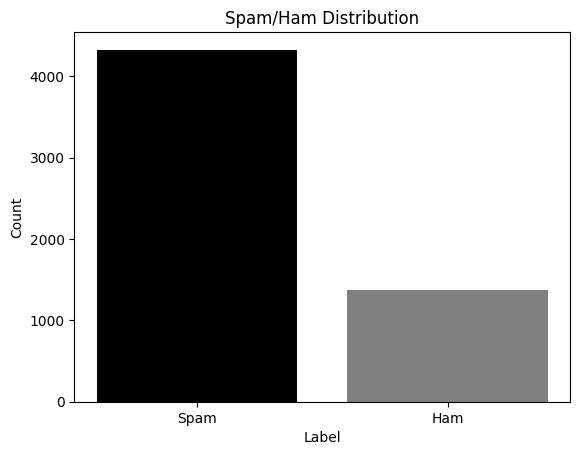

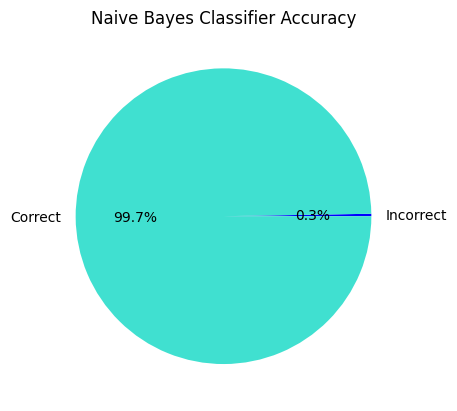

In [39]:
spam_counts = df['spam'].value_counts()
ham_counts = 4360 - spam_counts

plt.bar(['Spam', 'Ham'], spam_counts, color=['black', 'grey'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam/Ham Distribution')
plt.show()

pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)

plt.pie([1 - accuracy, accuracy], labels=['Incorrect', 'Correct'], autopct="%1.1f%%", colors=['blue', 'turquoise'])
plt.title('Naive Bayes Classifier Accuracy')
plt.show()

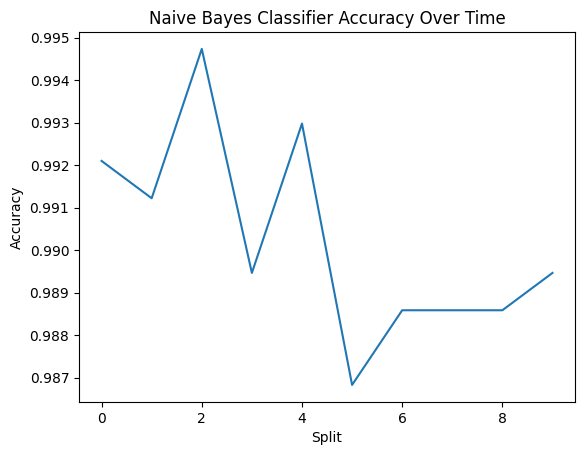

In [40]:
accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size=0.20, random_state=i)
    classifier = MultinomialNB().fit(X_train, y_train)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy Over Time')
plt.show()
